In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
df=pd.read_csv('/Users/hlamba/Documents/DSSG/Project_Week1/AgentSmith/Data/Building_Violations_sample_50000.csv')

/Users/hlamba/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
del df['Unnamed: 0']
import re
def spaces_to_snake(column_name):
    s = re.sub(r"\s+", '_', column_name)
    return s.lower()

df.columns = [spaces_to_snake(col) for col in df.columns]

In [7]:
df.groupby('department_bureau').count()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,inspection_number,inspection_status,inspection_waived,inspection_category,address,property_group,ssa,latitude,longitude,location
department_bureau,,,,,,,,,,,,,,,,,,,,,
BOILER,740,740,740,740,740,538,740,58,451,715,...,740,740,740,740,740,740,144,736,736,736
CONSERVATION,32656,32656,32656,32656,32656,9259,32649,16925,32112,32641,...,32656,32656,32656,32656,32656,32656,6134,32622,32622,32622
CONSTRUCTION EQUIPMENT,6,6,6,6,6,0,6,0,6,1,...,6,6,6,6,6,6,2,6,6,6
DEMOLITION,3185,3185,3185,3185,3185,38,3185,0,53,3185,...,3185,3185,3185,3185,3185,3185,353,3184,3184,3184
ELECTRICAL,1551,1551,1551,1551,1551,407,1513,3,1358,1244,...,1551,1551,1551,1551,1551,1551,281,1548,1548,1548
ELEVATOR,1624,1624,1624,1624,1624,787,1618,40,1577,1339,...,1624,1624,1624,1624,1624,1624,429,1624,1624,1624
IRON,493,493,493,493,493,186,493,0,395,490,...,493,493,493,493,493,493,150,491,491,491
NEW CONSTRUCTION,1375,1375,1375,1375,1375,113,1233,6,1345,1117,...,1375,1375,1375,1375,1375,1375,217,1374,1374,1374
PLUMBING,1412,1412,1412,1412,1412,246,1412,12,976,1283,...,1412,1412,1412,1412,1412,1412,208,1412,1412,1412


In [11]:
pd.value_counts(df.department_bureau)

CONSERVATION                  32656
SPECIAL TASK FORCE             4491
DEMOLITION                     3185
ELEVATOR                       1624
ELECTRICAL                     1551
PLUMBING                       1412
NEW CONSTRUCTION               1375
REFRIGERATION                   932
BOILER                          740
VENTILATION                     713
IRON                            493
SPECIAL INSPECTION PROGRAM      453
SIGNS                           339
WATER                            30
CONSTRUCTION EQUIPMENT            6
dtype: int64

In [12]:
pd.value_counts(df.violation_code)

CN190019    2463
CN196029    1619
CN061014    1488
CN070024    1326
CN193110    1065
CN104015    1011
NC2011       964
CN070014     937
CN198019     904
CN197019     890
EV1110       730
CN138056     725
CN138106     696
CN197087     638
CN015062     625
...
BR1073      1
PL151047    1
CN114025    1
CN110035    1
EV0185      1
IR0082      1
IR0092      1
CN193353    1
CN193355    1
BR1060      1
PL234046    1
PL234010    1
EV1180      1
IR0086      1
FR910       1
Length: 757, dtype: int64

In [13]:
pd.value_counts(df.violation_status)

OPEN        36355
COMPLIED    13500
NO ENTRY      145
dtype: int64

In [14]:
pd.value_counts(df.inspection_status)

FAILED    38371
PASSED     6426
CLOSED     5199
HOLD          4
dtype: int64

In [18]:
#WHO violates?
subset_data = df[(df.inspection_status=='FAILED')]

In [20]:
pd.value_counts(subset_data.property_group)

6124      25
21767     15
1555      13
20787     12
430699    12
19681     12
35298     12
20509     12
20660     12
20386     11
25617     11
13693     11
20822     10
13405     10
13851      9
...
91263     1
107655    1
408313    1
13461     1
220312    1
484511    1
642218    1
439128    1
462002    1
23736     1
21689     1
347322    1
25791     1
240838    1
458752    1
Length: 26197, dtype: int64

In [21]:
pd.unique(subset_data.location)

array(['(41.73308939713441,-87.60618433527188)',
       '(41.77708792596553,-87.61569442972947)',
       '(41.93799454179893,-87.70865671096144)', ...,
       '(41.9086941456714,-87.63448689691725)',
       '(41.782263477530066,-87.61044671992697)',
       '(41.80287663210569,-87.60990755107315)'], dtype=object)

In [22]:
pd.value_counts(subset_data.location)

(41.91482042670598,-87.77555966968384)     25
(41.68981014343913,-87.61221789119391)     12
(41.75045516050194,-87.60016657427184)     12
(41.7539641268013,-87.56278520127236)      12
(41.886706918965025,-87.63135247095529)    12
(41.76505512958016,-87.5636984239516)      11
(42.00562039518715,-87.66282386163921)     11
(41.88268648606934,-87.75500516556966)     10
(41.75657912070773,-87.64434206886949)     10
(41.7513740385263,-87.60630192717088)      10
(41.690655858648626,-87.61316690649062)     9
(41.7794135838113,-87.69476761863918)       9
(42.005303120054165,-87.68005990864383)     9
(41.87951578900716,-87.73708451474911)      9
(41.76387945921902,-87.64020061196354)      9
...
(41.91211976498153,-87.66678184188851)     1
(41.802879778113265,-87.58184369392683)    1
(41.721373718527246,-87.65871943983412)    1
(41.79699072981701,-87.61751160276981)     1
(41.883667240826995,-87.77319198941096)    1
(41.857057816196246,-87.71379002189205)    1
(41.8563429343087,-87.7140626752577)

In [34]:
vdates=subset_data[subset_data.location=='(41.91482042670598,-87.77555966968384)'][['violation_date','violation_code','inspector_id']]

In [26]:
%matplotlib inline

In [28]:
import matplotlib

In [35]:
vdates

,violation_date,violation_code,inspector_id
4748,04/11/2014,EL0016,BL00567
4749,04/11/2014,NC2011,BL00567
4751,04/11/2014,EL0022,BL00567
4755,04/11/2014,PL154017,BL00567
4756,04/11/2014,VT1010,BL00567
4757,04/11/2014,PL164027,BL00567
4762,04/11/2014,CN031023,BL00567
4763,04/11/2014,EL0084,BL00567
4765,04/11/2014,PL239010,BL00567
4769,04/11/2014,NC5062,BL00567


In [31]:
vdates

4748     04/11/2014
4749     04/11/2014
4751     04/11/2014
4755     04/11/2014
4756     04/11/2014
4757     04/11/2014
4762     04/11/2014
4763     04/11/2014
4765     04/11/2014
4769     04/11/2014
4770     04/11/2014
4772     04/11/2014
4773     04/11/2014
4774     04/11/2014
4775     04/11/2014
4776     04/11/2014
4777     04/11/2014
4782     04/11/2014
4785     04/11/2014
4786     04/11/2014
4787     04/11/2014
4788     04/11/2014
4789     04/11/2014
4790     04/11/2014
25254    11/25/2009
Name: violation_date, dtype: object

In [36]:
df.dtypes

id                                int64
violation_last_modified_date     object
violation_date                   object
violation_code                   object
violation_status                 object
violation_status_date            object
violation_description            object
violation_location               object
violation_inspector_comments     object
violation_ordinance              object
inspector_id                     object
inspection_number                 int64
inspection_status                object
inspection_waived                object
inspection_category              object
department_bureau                object
address                          object
property_group                    int64
ssa                              object
latitude                        float64
longitude                       float64
location                         object
dtype: object

In [38]:
df.violation_date=pd.to_datetime(df.violation_date)

In [39]:
df.dtypes

id                                       int64
violation_last_modified_date            object
violation_date                  datetime64[ns]
violation_code                          object
violation_status                        object
violation_status_date                   object
violation_description                   object
violation_location                      object
violation_inspector_comments            object
violation_ordinance                     object
inspector_id                            object
inspection_number                        int64
inspection_status                       object
inspection_waived                       object
inspection_category                     object
department_bureau                       object
address                                 object
property_group                           int64
ssa                                     object
latitude                               float64
longitude                              float64
location     

In [42]:
subset_data=df[df.violation_code=='CN190019']

In [43]:
subset_data=pd.sort(subset_data,columns='violation_date')

AttributeError: 'module' object has no attribute 'sort'

In [45]:
subset_data.sort(columns='violation_date')

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location
49999,1834762,01/12/2007,2006-01-01,CN190019,COMPLIED,01/11/2007,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY TO INTERIOR TO VERIFY OCCUPANCY AND D...,Arrange for inspection of premises. (13-12-100),...,FAILED,N,PERIODIC,CONSERVATION,200 N KOSTNER AVE,1531,NaN,41.883310,-87.735709,"(41.88330951242491,-87.73570901056128)"
49990,1439036,04/16/2009,2006-01-01,CN190019,COMPLIED,03/12/2009,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY TO INTERIOR.,Arrange for inspection of premises. (13-12-100),...,FAILED,N,PERIODIC,CONSERVATION,608 E 62ND ST,19387,NaN,41.782263,-87.610447,"(41.782263477530066,-87.61044671992697)"
49960,1427762,06/12/2006,2006-01-02,CN190019,COMPLIED,02/24/2006,ARRANGE PREMISE INSPECTION,NaN,ARRANGE FOR INSPECTION,Arrange for inspection of premises. (13-12-100),...,PASSED,N,PERIODIC,CONSERVATION,1642 N BOSWORTH AVE,5569,33,41.911939,-87.666724,"(41.91193925669855,-87.66672362410895)"
49952,1446659,06/22/2006,2006-01-02,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY,Arrange for inspection of premises. (13-12-100),...,FAILED,N,PERIODIC,CONSERVATION,5476 W HIGGINS AVE,12011,NaN,41.969518,-87.764156,"(41.9695179980072,-87.76415565134165)"
49981,1566701,03/31/2008,2006-01-02,CN190019,COMPLIED,01/14/2008,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY TO INTERIOR.,Arrange for inspection of premises. (13-12-100),...,FAILED,N,PERIODIC,CONSERVATION,1455 W FARGO AVE,239959,NaN,42.017019,-87.667582,"(42.01701924785849,-87.66758179030381)"
49956,1548406,08/10/2006,2006-01-02,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY INTO THE BUILDING; 1788-97 BUILDING -...,Arrange for inspection of premises. (13-12-100),...,FAILED,N,PERIODIC,CONSERVATION,1783 W HOWARD ST,14006,19,42.019290,-87.675802,"(42.019289941587736,-87.67580161669515)"
49903,1578394,08/18/2006,2006-01-04,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,NaN,BUILDING & PORCHES NO ENTRY,Arrange for inspection of premises. (13-12-100),...,CLOSED,N,PERIODIC,CONSERVATION,5635 W NORTH AVE,5267,NaN,41.909248,-87.767158,"(41.9092479750991,-87.76715778452494)"
49877,1274948,11/20/2006,2006-01-05,CN190019,COMPLIED,08/15/2006,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY TO INTERIOR TO VERIFY OCCUPANCY AND D...,Arrange for inspection of premises. (13-12-100),...,PASSED,N,COMPLAINT,CONSERVATION,5526 W DAKIN ST,154366,NaN,41.952361,-87.765626,"(41.95236131662357,-87.7656260634435)"
49885,1835620,04/24/2008,2006-01-05,CN190019,COMPLIED,03/27/2008,ARRANGE PREMISE INSPECTION,NaN,NEED ENTRY TO VERIFY SMOKE DETECTORS.,Arrange for inspection of premises. (13-12-100),...,FAILED,N,PERIODIC,CONSERVATION,7028 S CLYDE AVE,19980,42,41.767159,-87.574028,"(41.767159103030735,-87.57402843662479)"
49830,1248930,02/01/2006,2006-01-09,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,NaN,INTERIOR,Arrange for inspection of premises. (13-12-100),...,FAILED,N,COMPLAINT,CONSERVATION,1119 W 103RD ST,504957,NaN,41.706736,-87.650889,"(41.70673565340123,-87.6508890108319)"


In [82]:
subset_data_groups=df.groupby(['violation_code','violation_date'])

In [83]:
a=subset_data_groups.size()

In [88]:
a=pd.DataFrame(a)

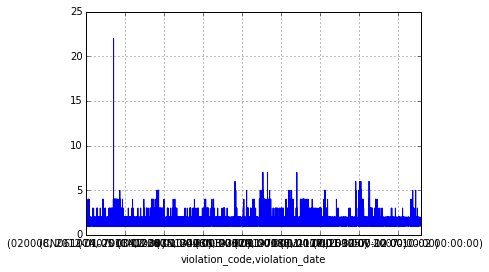

In [85]:
a.plot()

In [89]:
a.dtypes

0    int64
dtype: object

In [94]:
a.unstack(0)

0                                                          \
violation_code 020008 190019 199029 BR1000 BR1001 BR1010 BR1023 BR1024 BR1041   
violation_date                                                                  
2006-01-01        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-02        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-03        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-04        NaN    NaN      3    NaN      1    NaN    NaN    NaN    NaN   
2006-01-05        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-06        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-07        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-09        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-10        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-11        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-12        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-13        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-14        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-17        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-18        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-19        NaN    NaN      1    NaN    NaN      1    NaN    NaN    NaN   
2006-01-20        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-23        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-24        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-25        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-26        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-27        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-30        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-01-31        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-02-01        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-02-02        NaN    NaN      1    NaN    NaN    NaN    NaN    NaN    NaN   
2006-02-03        NaN    NaN      3    NaN    NaN    NaN    NaN    NaN    NaN   
2006-02-04        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2006-02-06        NaN      1    NaN    NaN      2    NaN    NaN    NaN    NaN   
2006-02-07        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...               ...    ...    ...    ...    ...    ...    ...    ...    ...   
2015-04-13        NaN      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-14        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-15        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-16        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-17        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-19        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-20        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-21        NaN    NaN    NaN    NaN      2    NaN    NaN    NaN    NaN   
2015-04-22        NaN    NaN    NaN    NaN      1    NaN    NaN    NaN    NaN   
2015-04-23        NaN    NaN    NaN    NaN      1    NaN    NaN    NaN    NaN   
2015-04-24        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-27        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-28        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-29        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-04-30        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015-05-01        NaN    NaN    NaN    NaN    NaN  

In [101]:
a=pd.crosstab(df.violation_date,df.violation_code)

In [102]:
a.loc(columns=['020008'])

In [103]:
a(['020008'])

TypeError: 'DataFrame' object is not callable

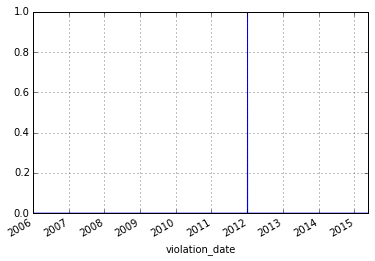

In [105]:
a['020008'].plot()